# Análise Bivariada
Inicialmente faça uma análise bivariada de sintomas de depressão (`phq9` ou `phq_grp`) com as características demográficas. Descreva o perfil com maiores incidências de sintomas de depressão.

Depois faça uma análise bivariada de características demográficas x hábitos saudáveis. **Qual perfil possui hábitos mais saudáveis?**

Por fim, faça uma análise bivariada de sintomas de depressão (`phq9` ou `phq_grp`) com os hábitos saudáveis (variáveis de atividade física e healthy eating index). **O que podemos observar?**

## Inicialização

### Importando pacotes e carregando dados

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

import utils  # Funções auxiliares para a análise

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.5f}'.format

In [2]:
# Carregando dados pré-processados
dataset_path = '../data/output/'
dataset_name = 'step_2_output.csv'

df = pd.read_csv(f"{dataset_path}{dataset_name}")

In [3]:
# Indicando categorias com ordenação
USE_CATEGORIES = True

if USE_CATEGORIES:
    df['PHQ_GRP'] = pd.Categorical(
        df['PHQ_GRP'], ['sem sint', 'lev', 'mod-sev',]
    )

    df['DMDEDUC'] = pd.Categorical(
        df['DMDEDUC'], ['< 9', '9 - 12', 'Ens Med', 'Sup Incomp', 'Supr Comp']
    )

    df['INDFMINC_GRP'] = pd.Categorical(
        df['INDFMINC_GRP'], [
            '< 5k', '5k - 10k', '10k - 15k', '15k - 20k', '20k - 25k', 
            '25k - 35k', '35k - 45k', '45k - 55k', '55k - 65k', '65k - 75k', '> 75k'
        ]
    )

    df['INDFMINC_ABV20K'] = pd.Categorical(
        df['INDFMINC_ABV20K'], ['< 20k', '> 20k']
    )

    df['ADHERENCE'] = pd.Categorical(
        df['ADHERENCE'], ['baixo', 'adeq', 'acima',]
    )

In [4]:
# Separando colunas de acordo com suas origens
# def split_columns_by_source(columns, step=1):
#     is_phq_column = lambda x: True if (x.find('DPQ') > -1) else False
#     phq_cols = [col for col in columns if is_phq_column(col)]
    
#     is_hei_column = lambda x: True if (x.find('HEI2015') > -1) else False
#     hei_cols = [col for col in columns if is_hei_column(col)]
    
#     demo_cols = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC', 'INDFMINC_ABV20K', 'INDFMINC_GRP']
#     pag_cols = ['PAG_MINW', 'ADHERENCE']
#     phq_score_cols = ['PHQ9', 'PHQ_GRP']
    
#     return demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols


# demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols = split_columns_by_source(df.columns)

quanti_cols = ['RIDAGEYR', 'INDFMINC', 'PHQ9', 'PAG_MINW', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
quali_cols = ['RIAGENDR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC_ABV20K', 'INDFMINC_GRP', 'PHQ_GRP', 'ADHERENCE']

print('Quanti:', quanti_cols)
print('Quali:', quali_cols)

# Definindo variáveis para comparação
quanti_ref = 'PHQ9'
quali_ref = 'PHQ_GRP'

Quanti: ['RIDAGEYR', 'INDFMINC', 'PHQ9', 'PAG_MINW', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
Quali: ['RIAGENDR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC_ABV20K', 'INDFMINC_GRP', 'PHQ_GRP', 'ADHERENCE']


## Funções Auxiliares

In [5]:
def quali_comparison(df, col, quali_ref=None, quanti_ref=None, figsize=(16, 4)):
    fig, ax = plt.subplots(1, 3, figsize=figsize, squeeze=False)
    plt.suptitle('Coluna Qualitativa: ' + col)
    
    if quanti_ref:
        sns.boxplot(
            data=df,
            x=col,
            y=quanti_ref,
            ax=ax[0][0],
        )
        
    if quali_ref:
        sns.histplot(
            data=df,
            x=col,
            hue=quali_ref,
            stat='proportion',
            multiple='dodge',
            shrink=0.7,
            ax=ax[0][1],
        )
    
    if quanti_ref:
        sns.histplot(
            data=df,
            x=quanti_ref,
            hue=col,
            # stat='proportion',
            multiple='stack',
            kde=True,
            discrete=True,
            ax=ax[0][2],
        )

# quali_comparison(df, 'RIAGENDR', 'PHQ_GRP', 'PHQ9')

In [6]:
def quanti_comparison(df, col, quali_ref=None, quanti_ref=None, figsize=(16, 4)):
    fig, ax = plt.subplots(1, 3, figsize=figsize, squeeze=False)
    plt.suptitle('Coluna Qualitativa: ' + col)
    
    if quali_ref:
        sns.boxplot(
            data=df,
            x=quali_ref,
            y=col,
            ax=ax[0][0]
        )
    
        sns.histplot(
            data=df,
            x=col,
            # y=quanti_ref,
            hue=quali_ref,
            # stat='proportion',
            multiple='stack',
            kde=True,
            ax=ax[0][1],
        )
    
        if quanti_ref:
            sns.scatterplot(
                data=df,
                x=col,
                y=quanti_ref,
                # hue=quali_ref,
                ax=ax[0][2]
            )

## Outros experimentos

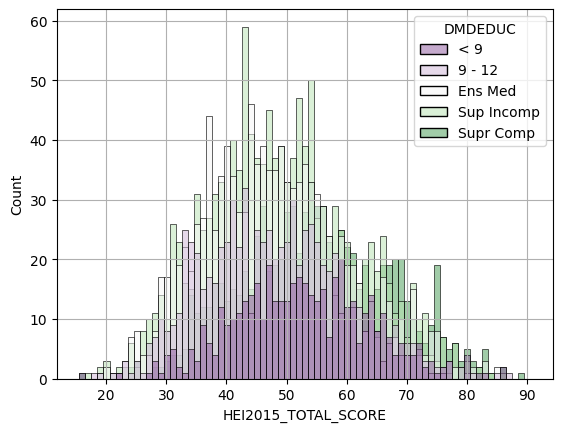

In [7]:
sns.histplot(
    x=df.HEI2015_TOTAL_SCORE, 
    hue=df.DMDEDUC, 
    discrete=True, 
    palette='PRGn'
)
plt.grid()

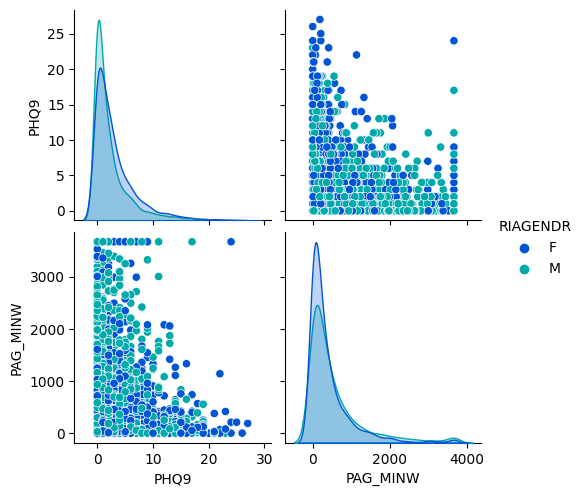

In [8]:
sns.pairplot(
    df,
    hue='RIAGENDR',
    palette='winter',
    vars=['PHQ9','PAG_MINW']
) 

<AxesSubplot: xlabel='RIDRETH1', ylabel='PHQ9'>

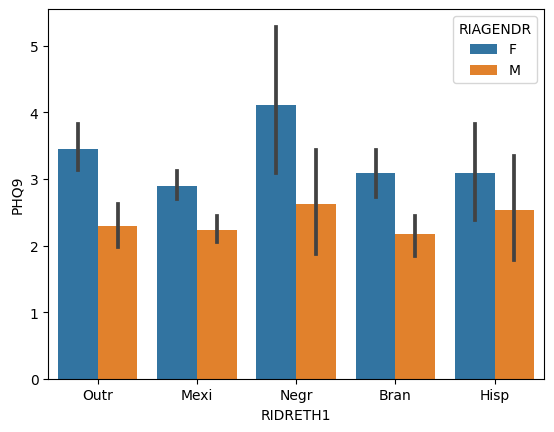

In [9]:
sns.barplot(
    data=df,
    x='RIDRETH1',
    y='PHQ9',
    hue='RIAGENDR',
)   

## Variáveis Qualitativas

### Correlação

In [10]:
# Analisando correlações de Spearman entre as variáveis qualitativas
# Não está funcionando pois esta correlação só funciona para dados numéricos (e não object ou category), mesmo que representem categorias

# sns.set(rc={'figure.figsize':(12,9)})
# sns.set(font_scale=0.5)

# quali_df = df[quali_cols]

# sns.heatmap(
#     quali_df.corr(method="spearman"),
#     annot=True, fmt='.2f',
#     cmap='PRGn', vmin=-1, vmax=1,
#     mask=np.triu(np.ones_like(quali_df.corr()))
# )

### Plots de Correlação

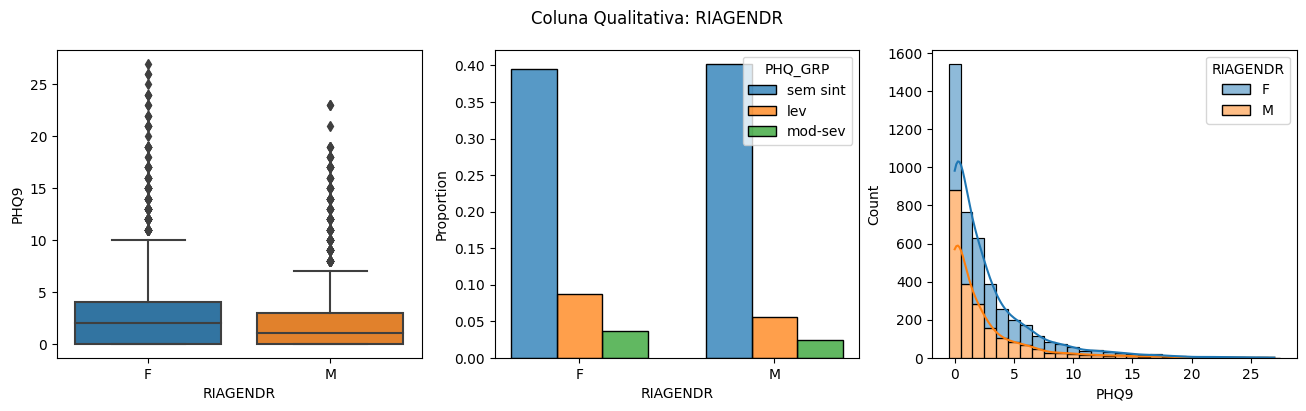

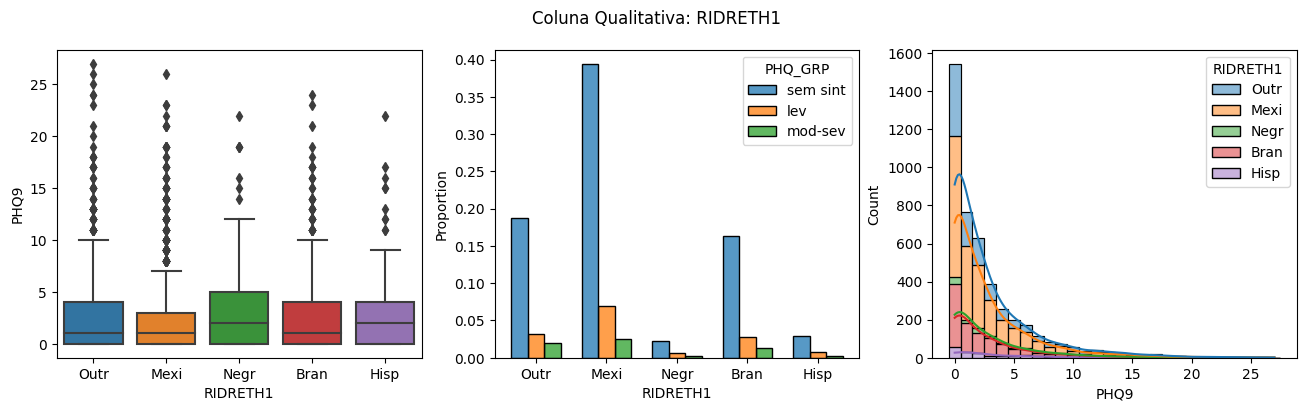

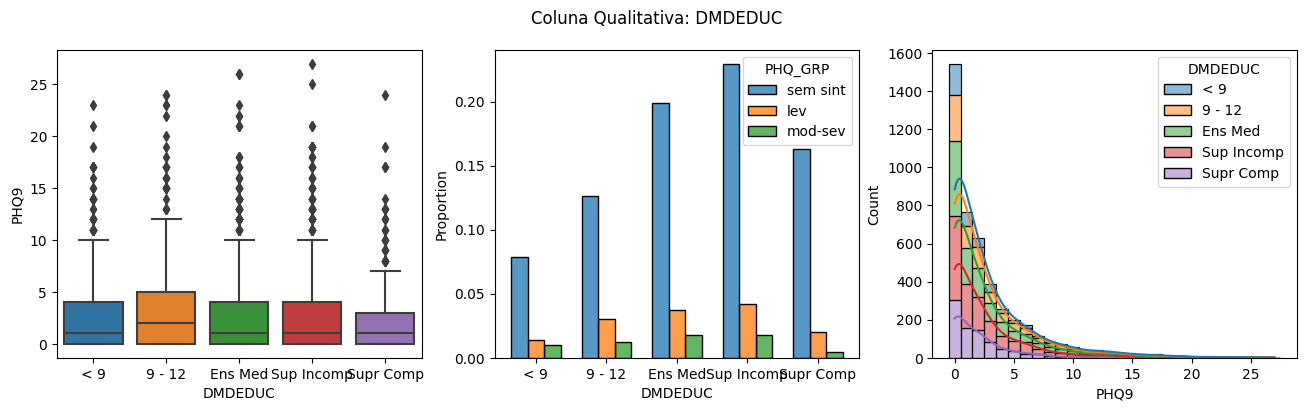

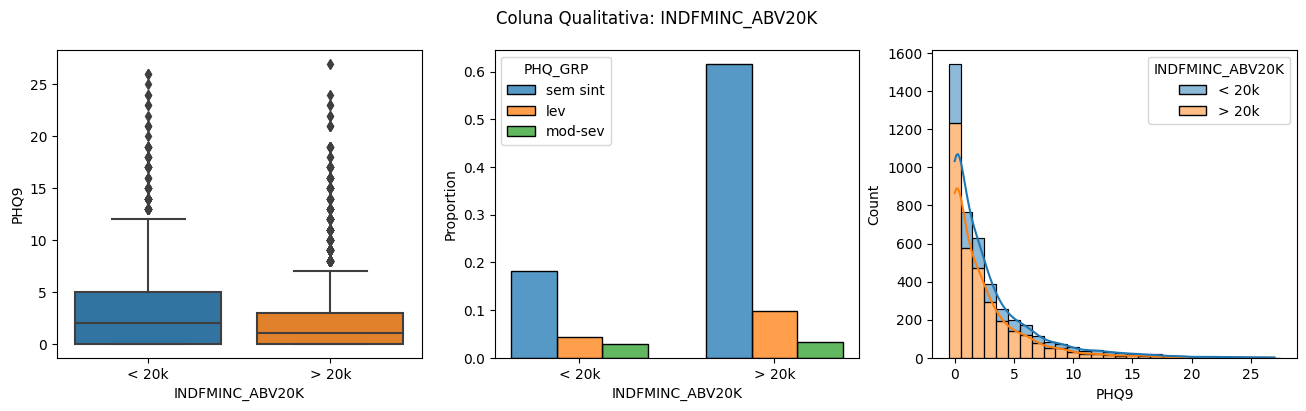

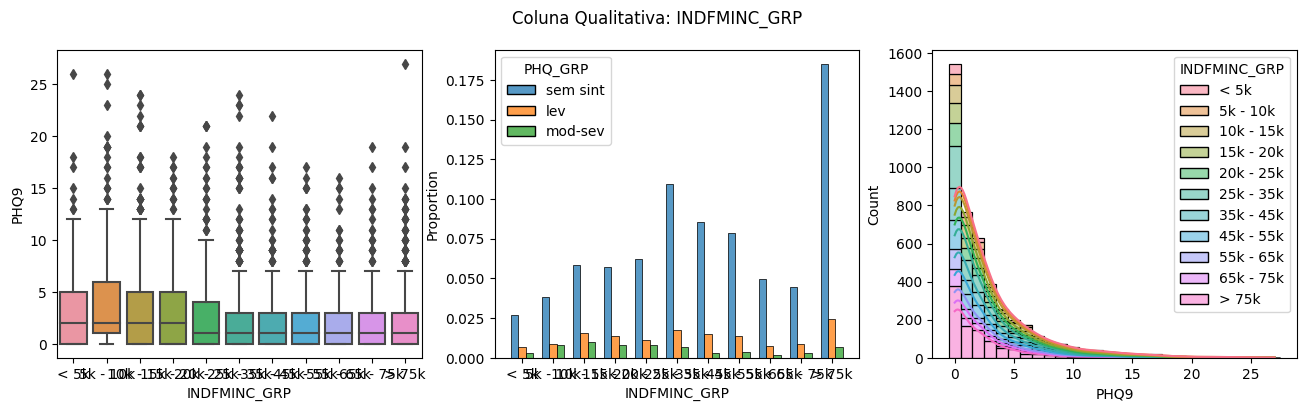

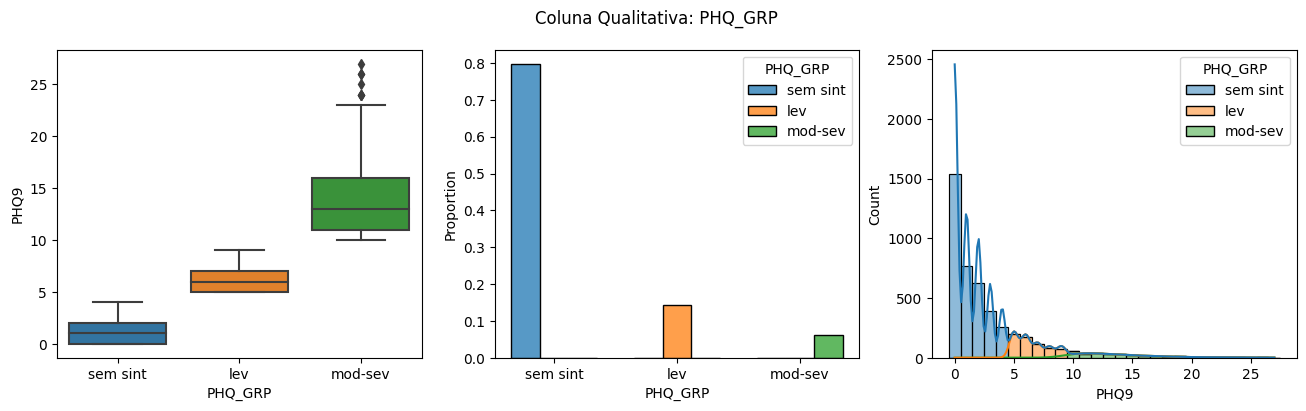

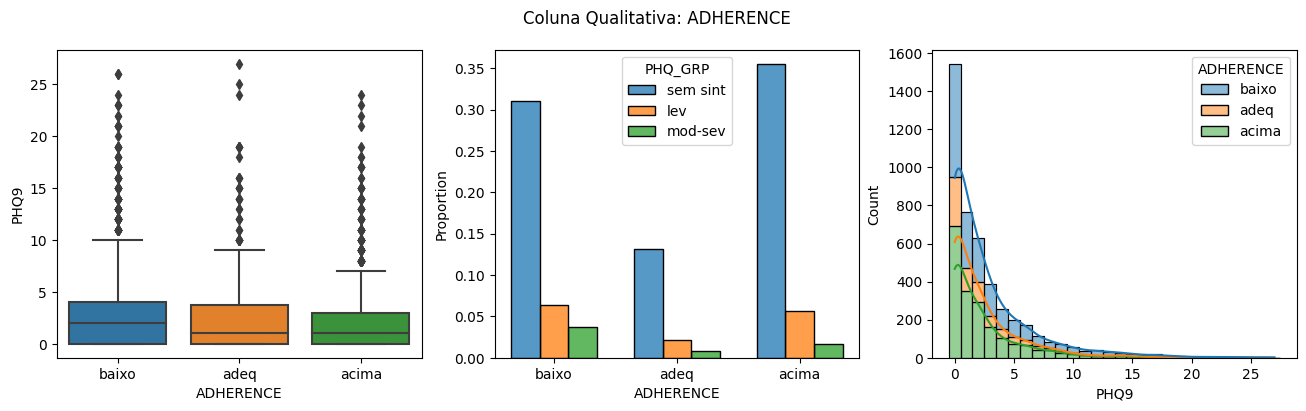

In [11]:
for col in quali_cols:
    quali_comparison(df, col, quali_ref, quanti_ref)

## Variáveis Quantitativas

### Correlação

<AxesSubplot: >

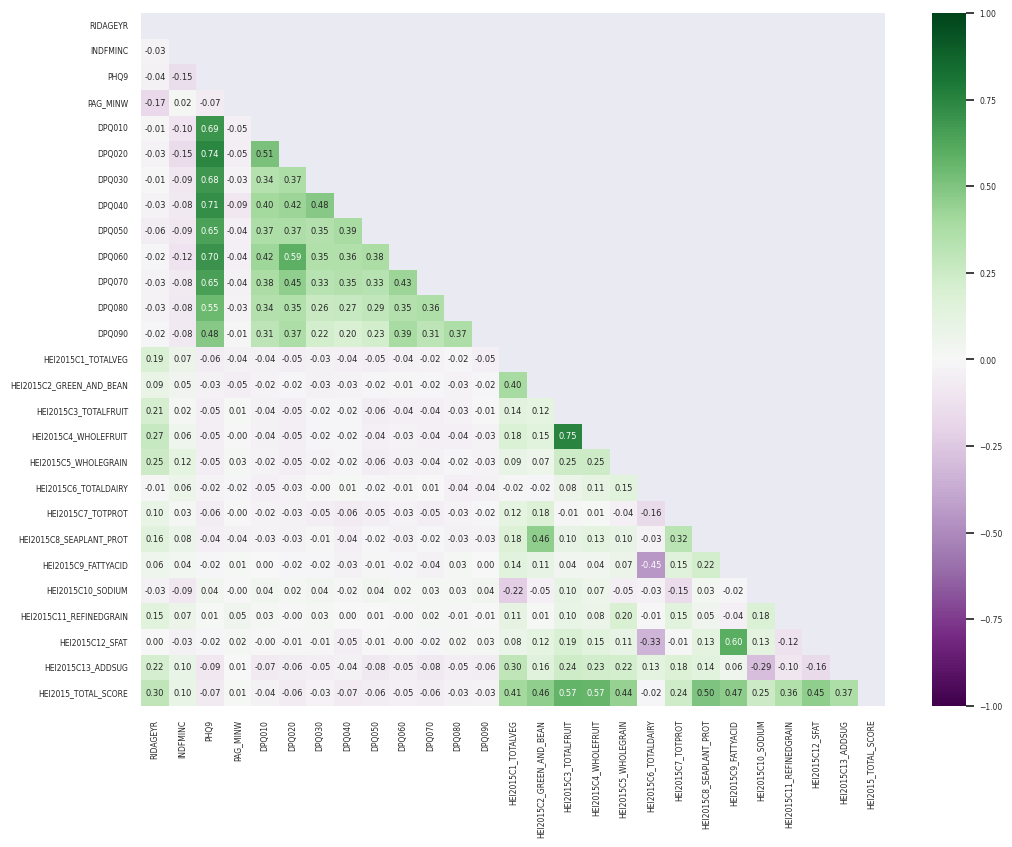

In [12]:
# Analisando correlações entre as variáveis quantitativas
sns.set(rc={'figure.figsize':(12,9)})
sns.set(font_scale=0.5)

quanti_df = df[quanti_cols]

sns.heatmap(
    quanti_df.corr(),
    annot=True, fmt='.2f',
    cmap='PRGn', vmin=-1, vmax=1,
    mask=np.triu(np.ones_like(quanti_df.corr()))
)

### Plots de Comparação

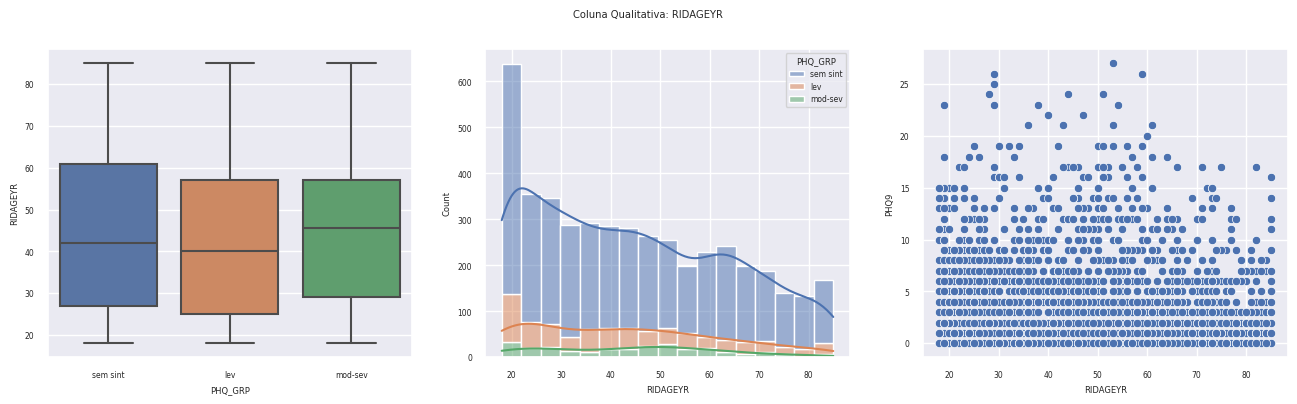

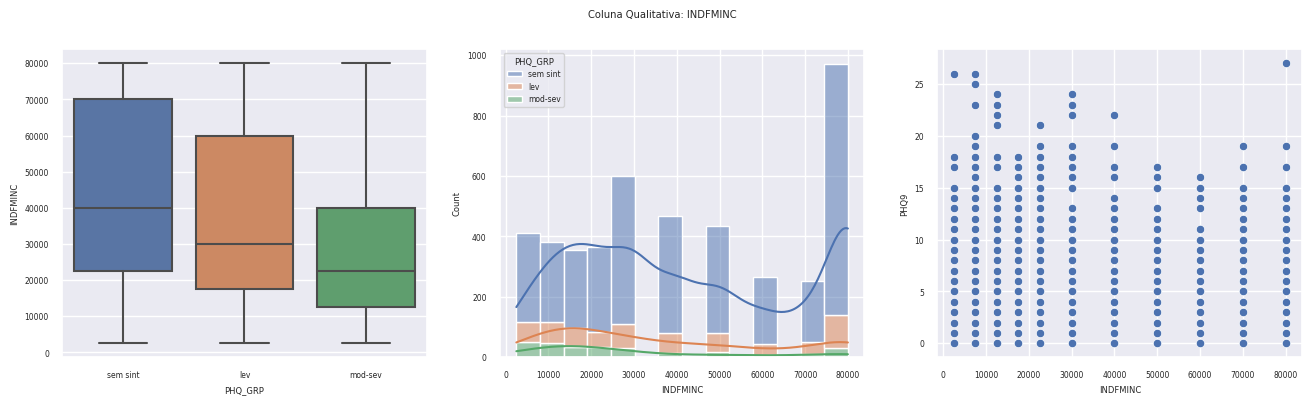

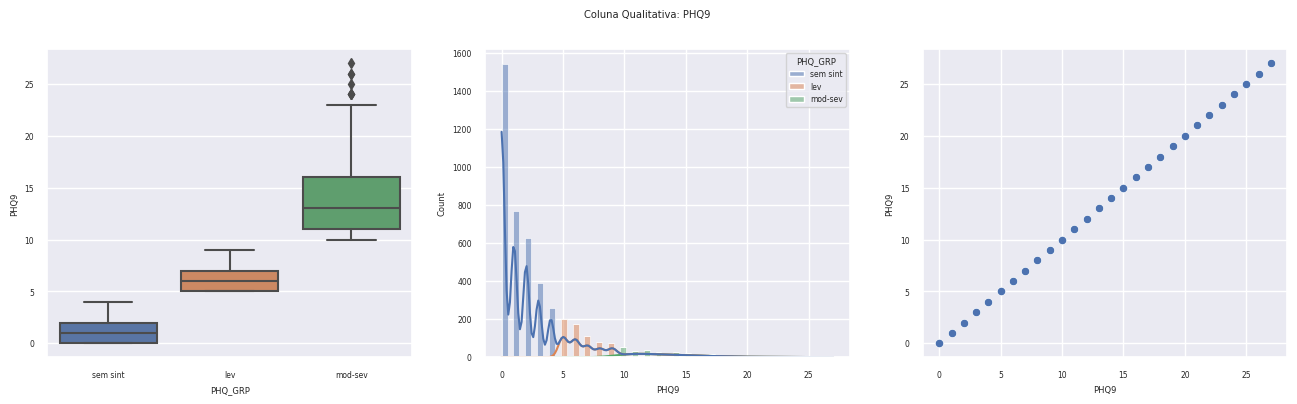

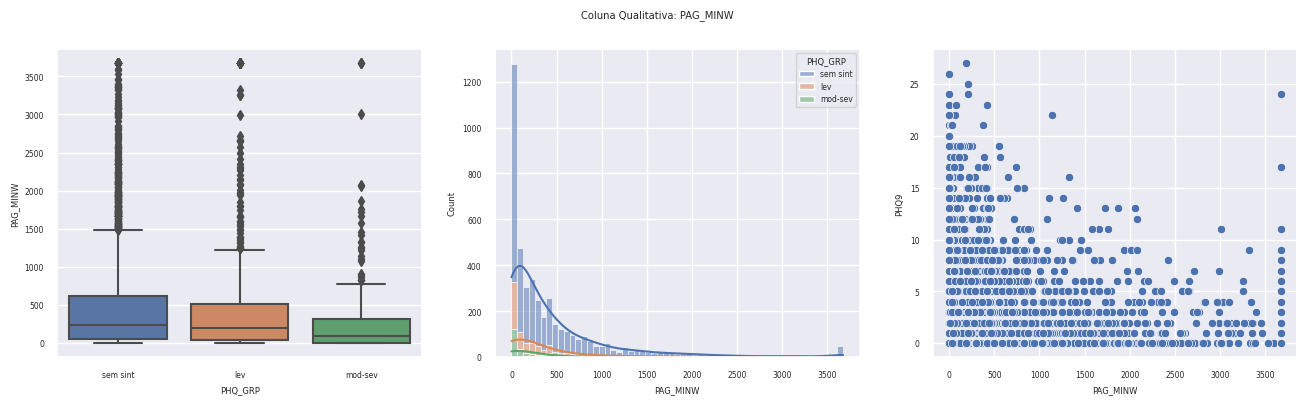

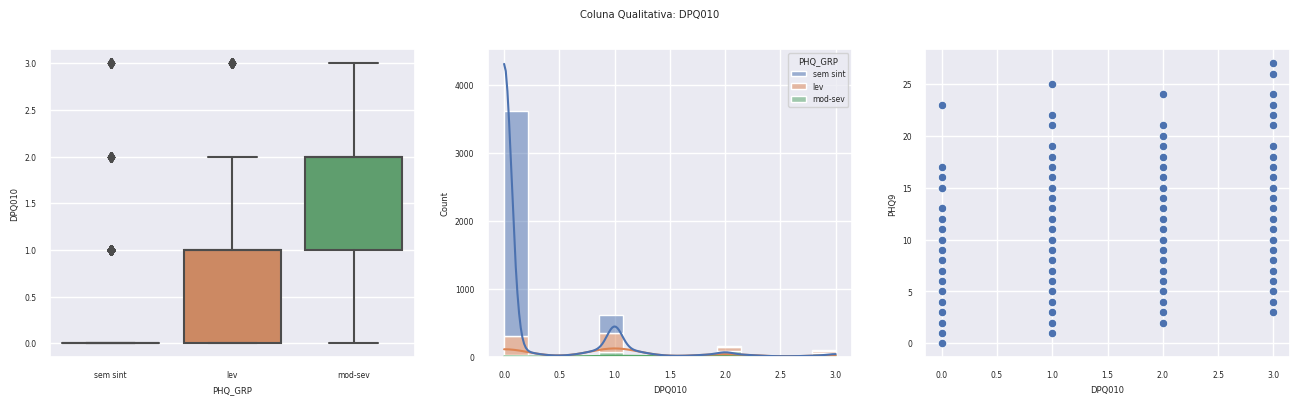

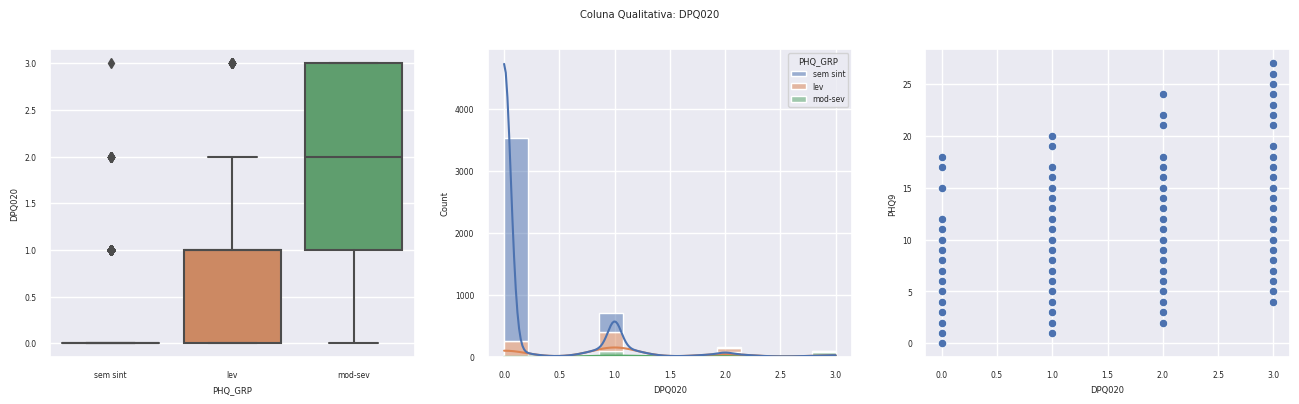

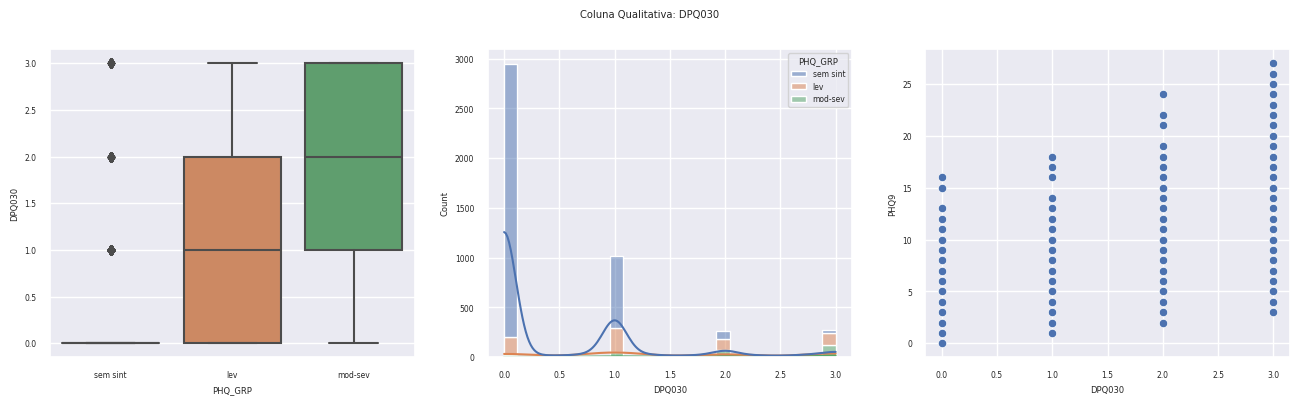

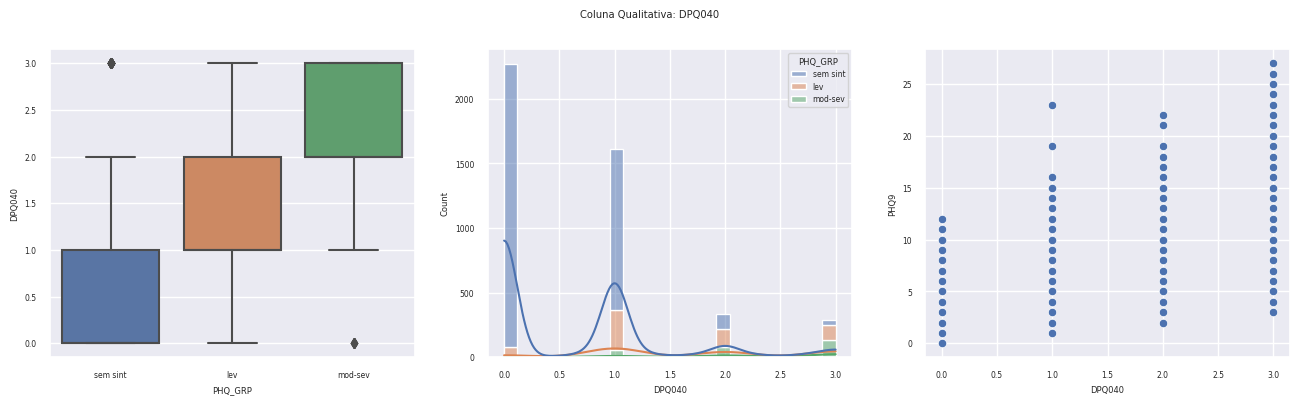

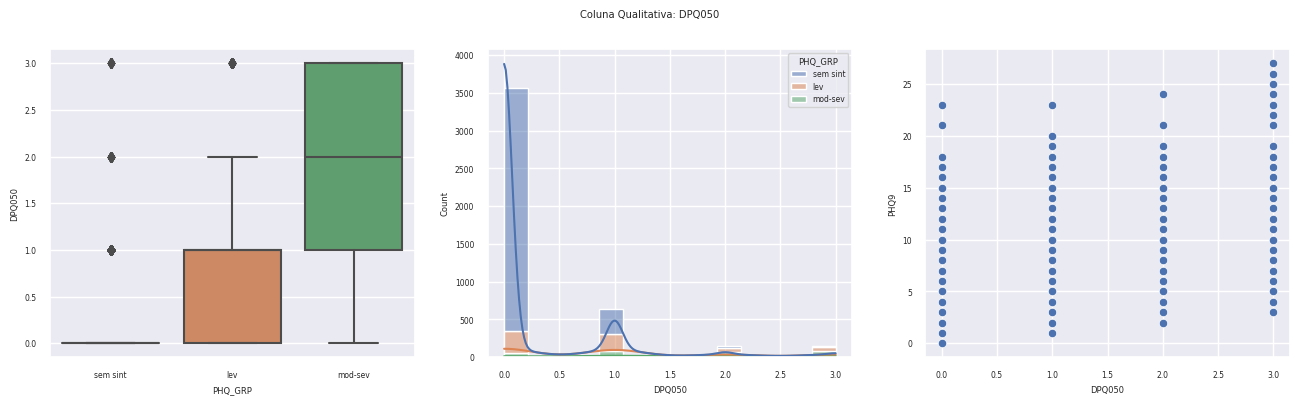

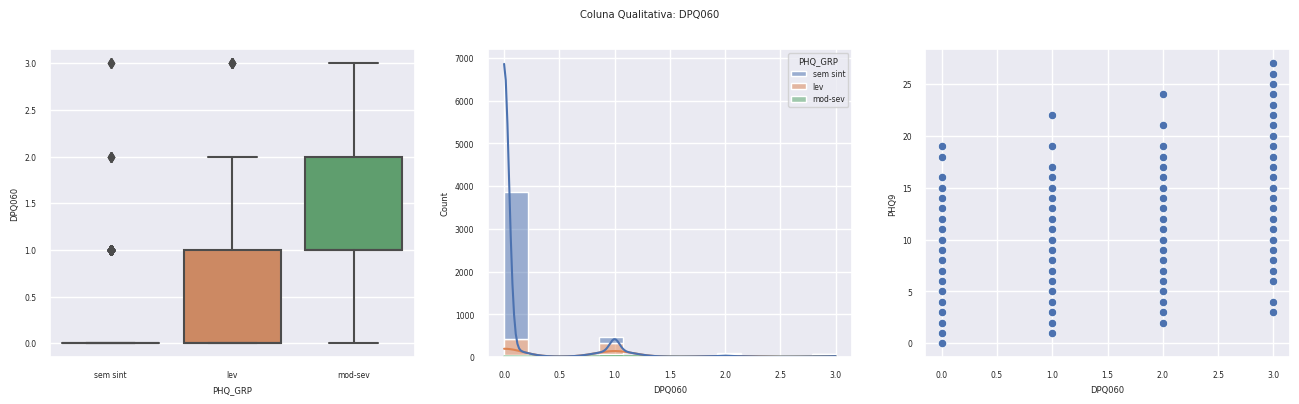

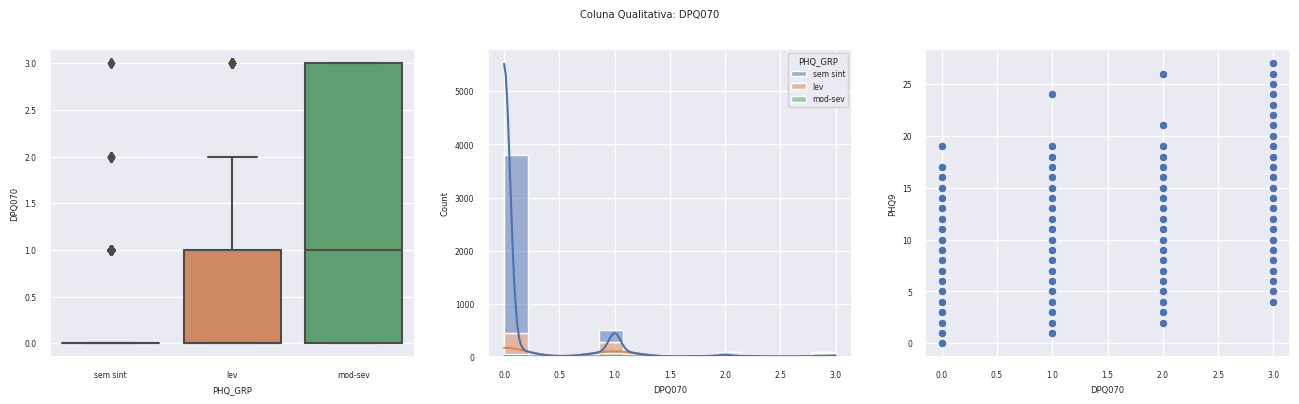

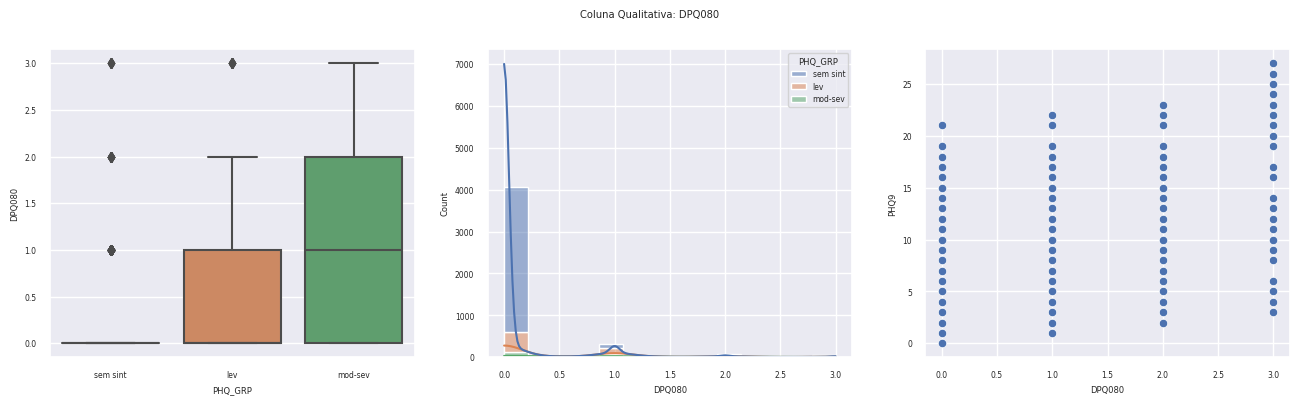

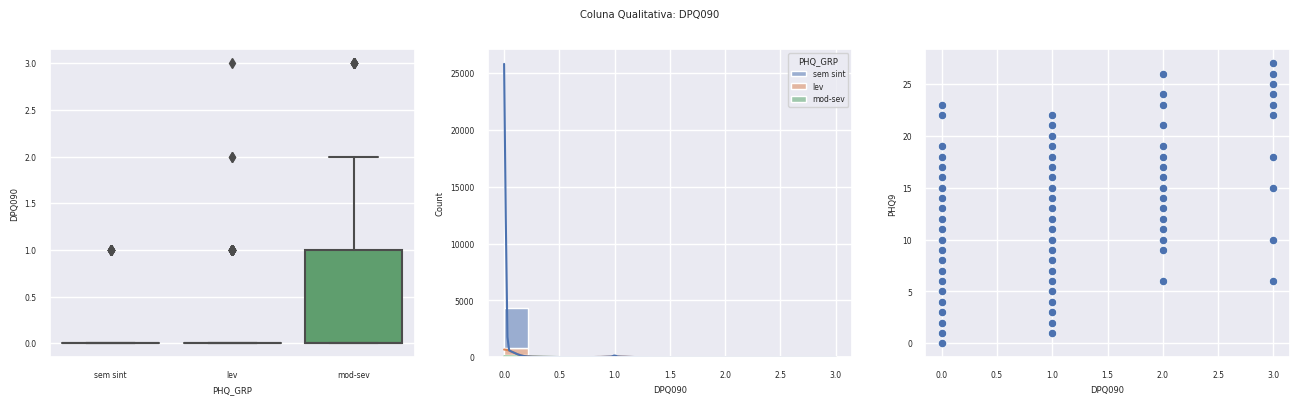

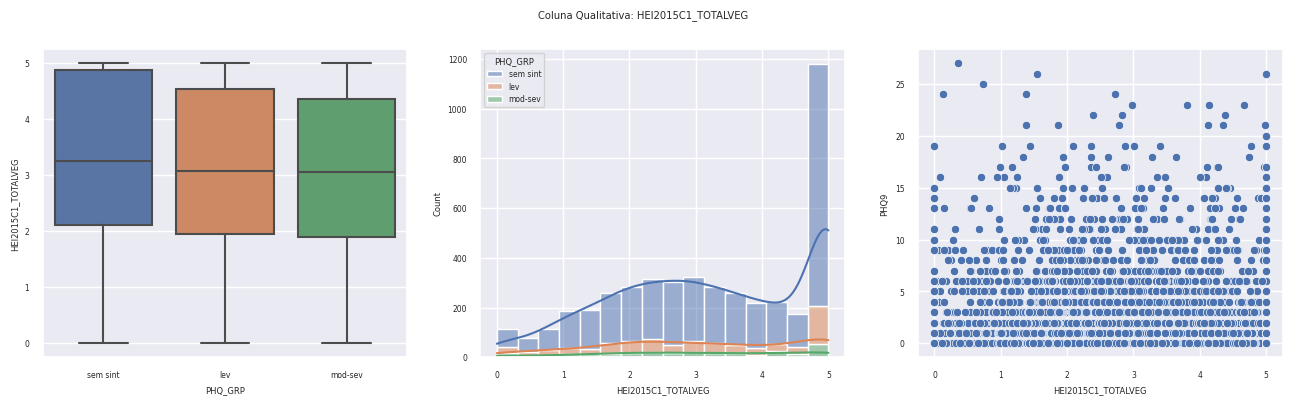

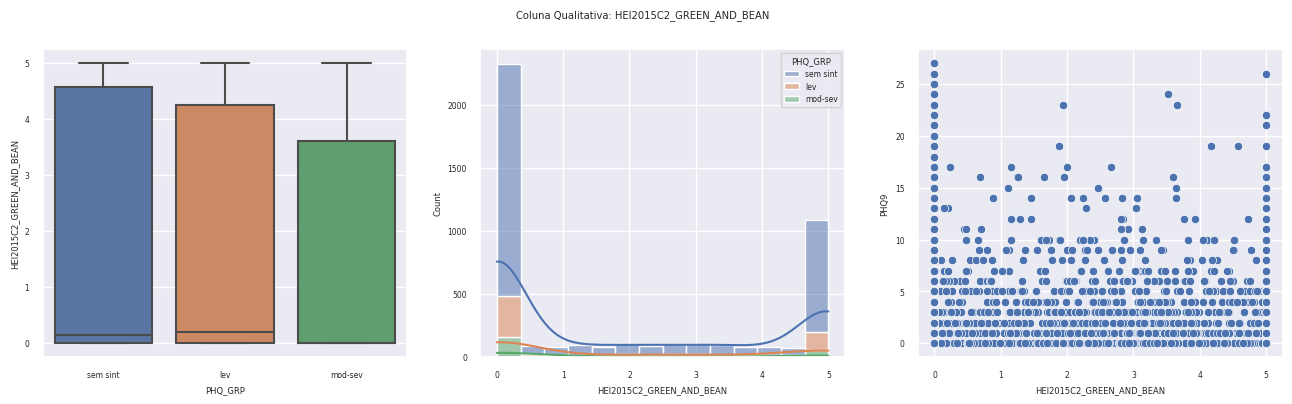

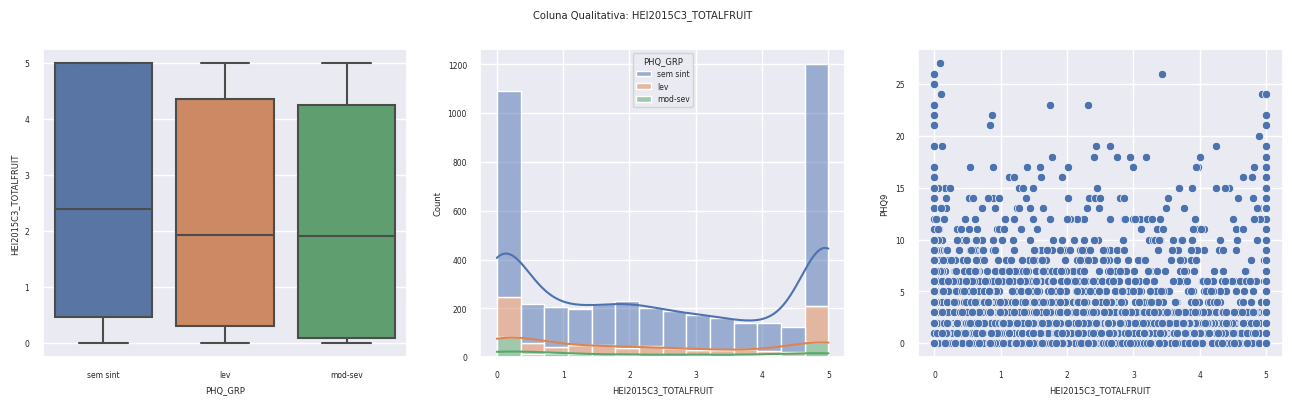

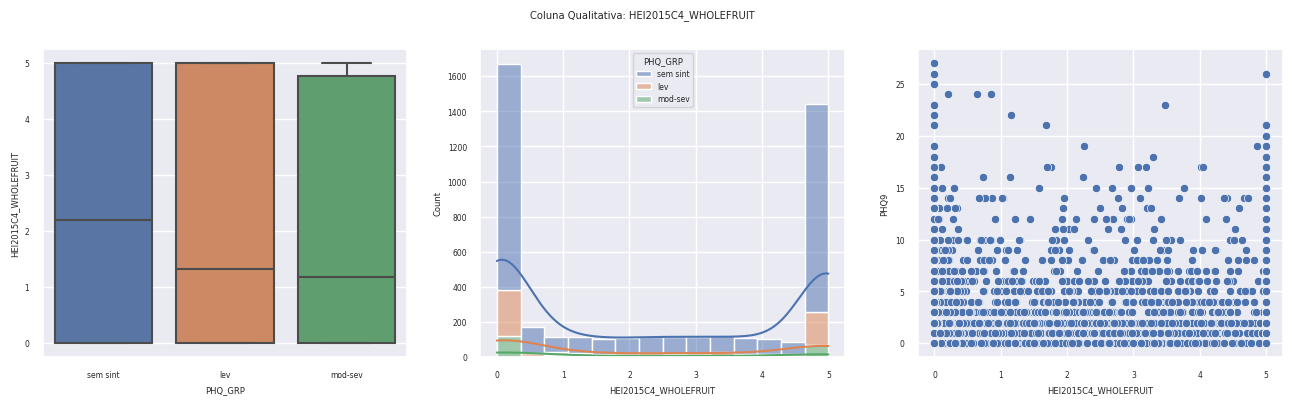

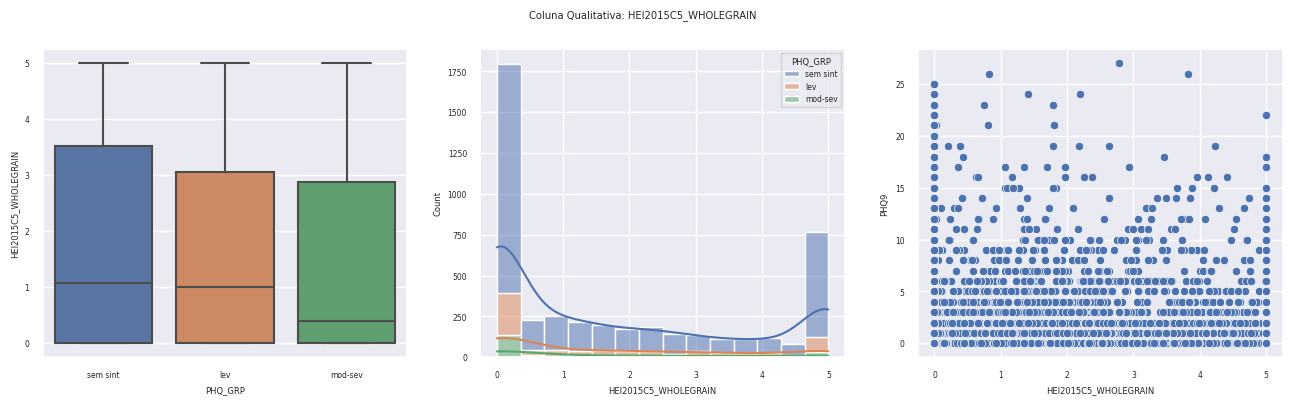

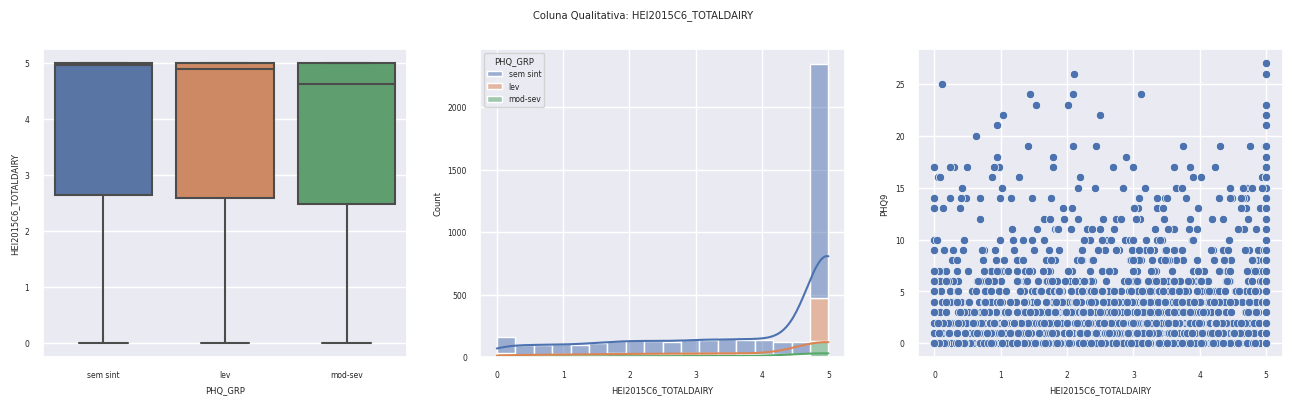

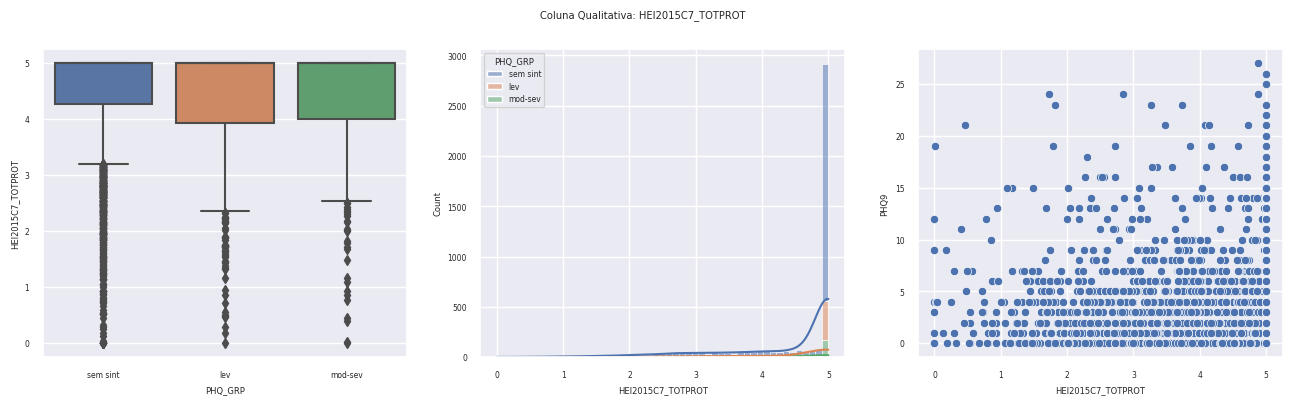

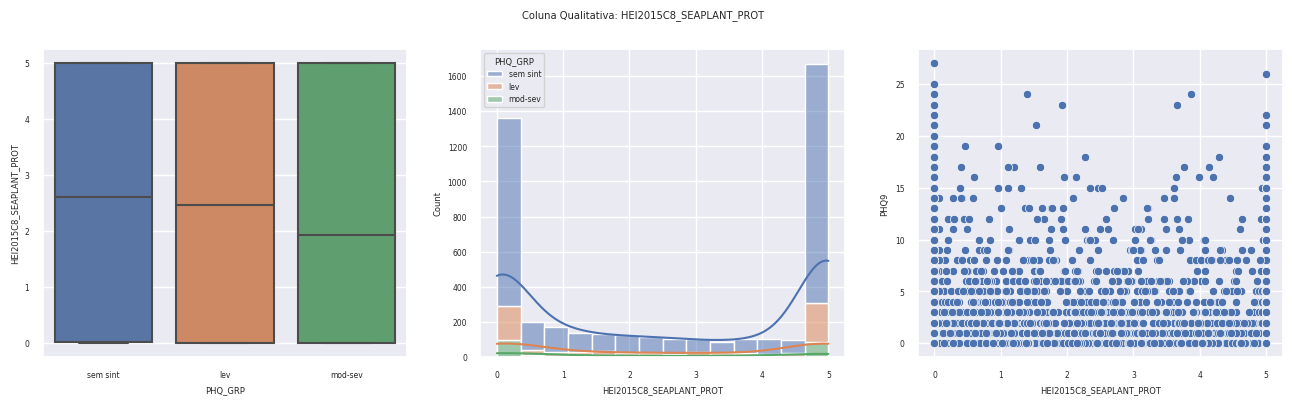

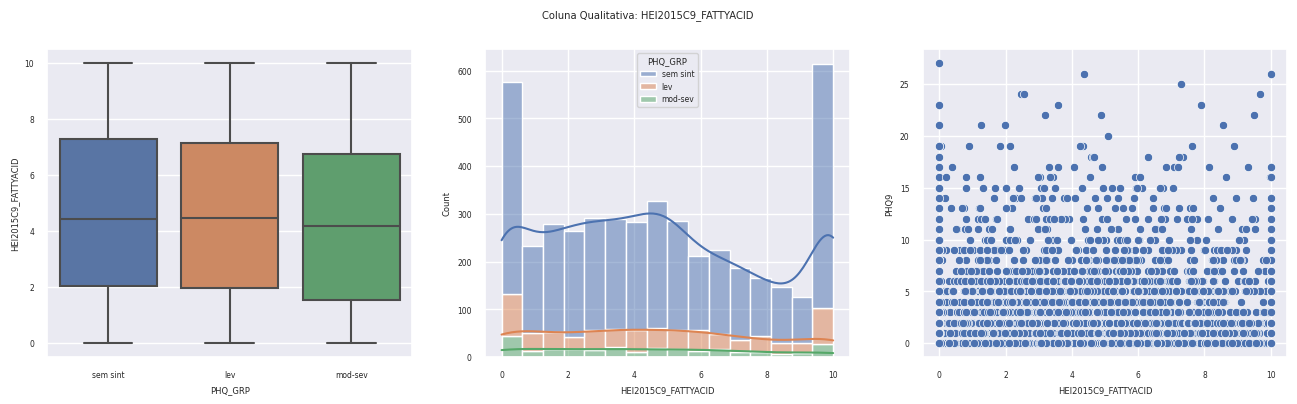

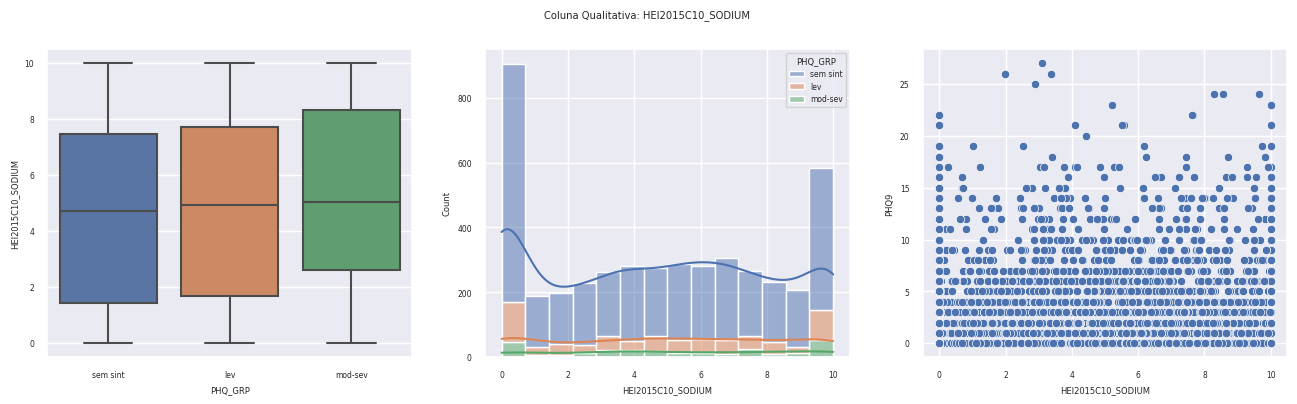

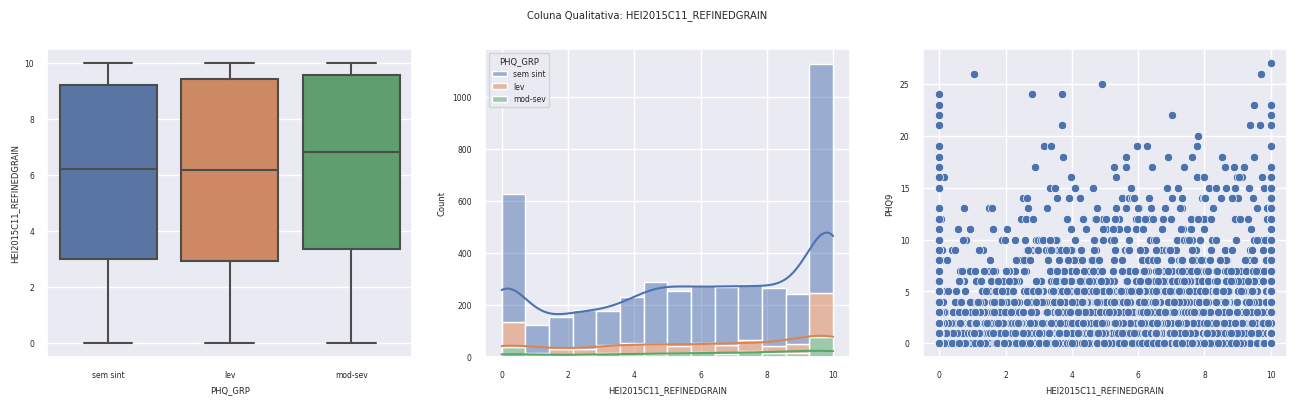

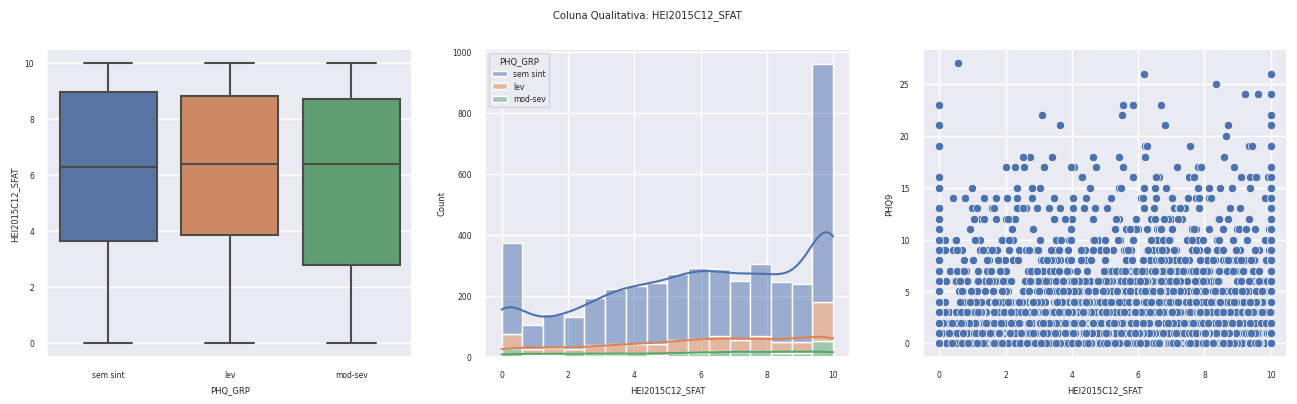

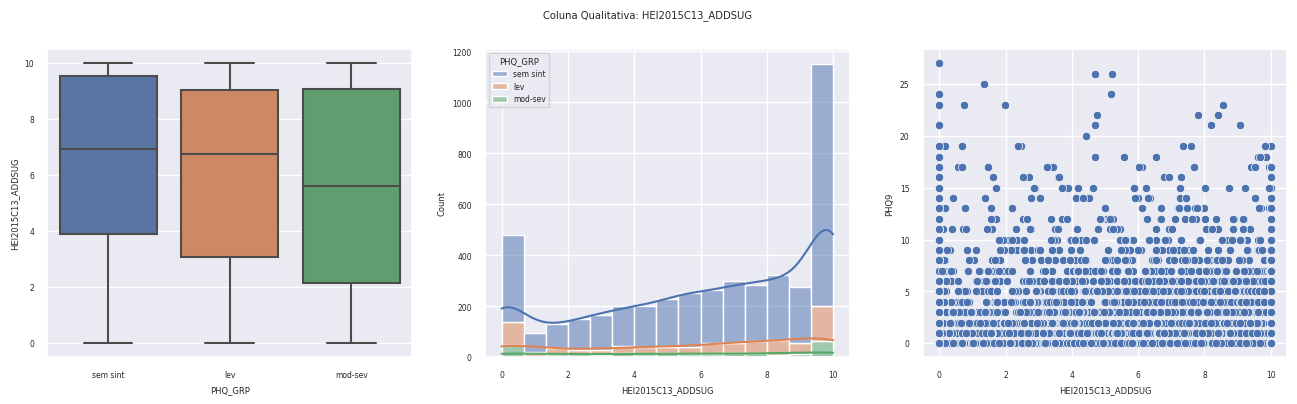

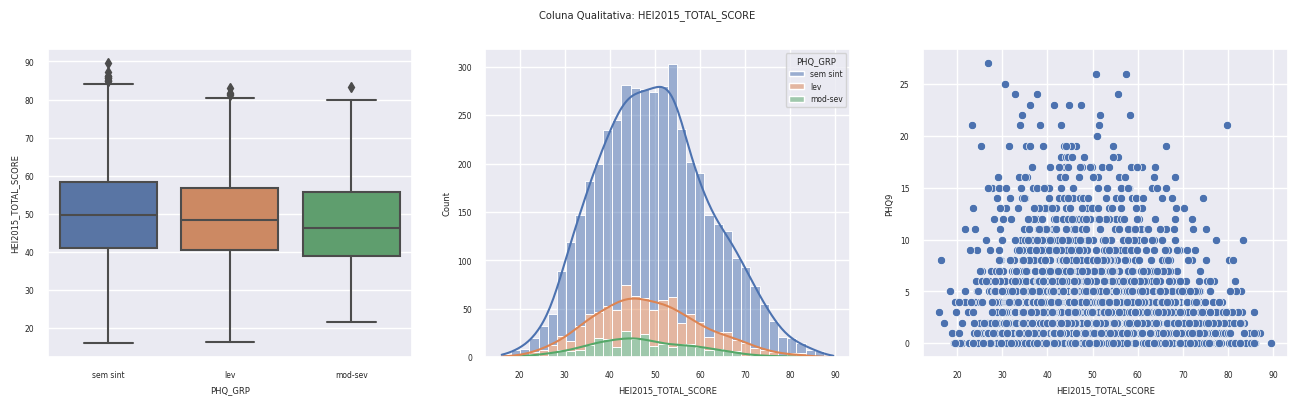

In [13]:
for col in quanti_cols:
    quanti_comparison(df, col, quali_ref, quanti_ref)

## Análise

In [14]:
# Variáveis Quanti para testar:
selected_quanti = [
    'RIDAGEYR', 'INDFMINC', 'PAG_MINW', 'HEI2015C2_GREEN_AND_BEAN', 
    'HEI2015C3_TOTALFRUIT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE',
]

selected_quali = [
    'RIAGENDR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC_ABV20K', 'ADHERENCE',
]

# Testes de Hipóteses

### Qui-quadrado de independencia

Queremos comparar as proporções (prevalências) de sintomas de depressão entre cada uma de nossas variáveis categóricas. Como queremos avaliar a associação entre duas variáveis categóricas, usaremos o teste qui-quadrado.

As hipóteses desse teste serão:

* H0 (nula) = Não há associação entre a variável categórica e sintomas de depressão.
* H1 (alternativa) = Há associação entre a variável categórica e sintomas de depressão.

In [56]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

def get_cramers_v(crosstab, chi2):
    n = crosstab.sum().sum()
    dof = min(crosstab.shape) - 1    
    return np.sqrt(chi2 / (n * dof))

def independence_chi2_test(df, cols, ref_col):
    results = []
    
    for col in cols:
        crosstab = pd.crosstab(df[col], df[ref_col])
        chi2, p, dof, expected = chi2_contingency(crosstab)
        rejected_H0 = False if p > 0.05 else True
        std_resids = sm.stats.Table(crosstab).standardized_resids
        cramers_v = get_cramers_v(crosstab, chi2)
        
        results.append(pd.DataFrame([{
            'Coluna': col,
            'Qui Quadrado': chi2,
            'P valor': p,
            'Graus Liberdade': dof, 
            'Rejeita H0': rejected_H0, 
            'V de Cramer': cramers_v,
            'Esperado': expected, 
            'Residuos': std_resids, 
        }]))
        
    return pd.concat(results, axis=0, ignore_index=True)


# independence_chi2_test(df, ['RIAGENDR', 'RIDRETH1'], 'PHQ_GRP')

In [57]:
quali_chi2_results = independence_chi2_test(df, quali_cols, quali_ref)
quali_chi2_results

,Coluna,Qui Quadrado,P valor,Graus Liberdade,Rejeita H0,V de Cramer,Esperado,Residuos
0,RIAGENDR,36.48308,0.00000,2,True,0.09003,"[[1858.48833592535, 332.39146856254166, 143.12...",PHQ_GRP sem sint lev mod-sev RIAGENDR ...
1,RIDRETH1,20.46585,0.00871,8,True,0.04768,"[[729.3810264385692, 130.45012219506776, 56.16...",PHQ_GRP sem sint lev mod-sev RIDRETH1 ...
2,DMDEDUC,55.40929,0.00000,8,True,0.07846,"[[365.4867807153966, 65.36747389469006, 28.145...",PHQ_GRP sem sint lev mod-sev DMDEDUC...
3,INDFMINC_ABV20K,95.17553,0.00000,2,True,0.14541,"[[913.3188180404354, 163.34747833814708, 70.33...",PHQ_GRP sem sint lev mod-sev IN...
4,INDFMINC_GRP,134.31281,0.00000,20,True,0.12215,"[[132.18040435458786, 23.640524327927128, 10.1...",PHQ_GRP sem sint lev mod-sev INDFM...
5,PHQ_GRP,"9,002.00000",0.00000,4,True,1.00000,"[[2853.822706065319, 510.40746500777607, 219.7...",PHQ_GRP sem sint lev mod-sev PHQ_GRP...
6,ADHERENCE,52.55791,0.00000,4,True,0.07641,"[[1476.279937791602, 264.03332592757164, 113.6...",PHQ_GRP sem sint lev mod-sev ADHERENC...


Todas as variáveis categóricas avaliadas tiveram `p < 0.05`, ou seja, rejeitaram H0, apresentando diferenças significativas de prevalência de sintomas de depressão.

Para entender o tamanho do efeito, é necessário checar o V de Cramer.

In [60]:
def show_cramers_v_effect_sizes():
    effect_sizes = pd.DataFrame(
        np.array([
            [1, .1, .3, .5],
            [2, .07, .21, .35],
            [3, .06, .17, .29],
            [4, .05,.15,.25],
            [5, .04, .13, .22]
        ]), 
        columns=['Graus de Liberdade', 'Efeito Pequeno', 'Efeito Médio', 'Efeito Grande']
    )
    return effect_sizes

show_cramers_v_effect_sizes()

,Graus de Liberdade,Efeito Pequeno,Efeito Médio,Efeito Grande
0,1.00000,0.10000,0.30000,0.50000
1,2.00000,0.07000,0.21000,0.35000
2,3.00000,0.06000,0.17000,0.29000
3,4.00000,0.05000,0.15000,0.25000
4,5.00000,0.04000,0.13000,0.22000


### ANOVA

Neste caso queremos comparar a média das variáveis numéricas para os três grupos de sintomas de depressão. Como queremos comparar as médias de mais de dois grupos independentes, teste F da ANOVA será utilizado.

As hipóteses desse teste serão:

* H0 (nula) = Não existe diferença entre os grupos de depressão com relação à variável numérica.
* H1 (alternativa) = Existe pelo menos uma diferença na média da variável numérica entre os grupos de sintomas de depressão.

In [73]:
df[ref_col].value_counts().index

CategoricalIndex(['sem sint', 'lev', 'mod-sev'], categories=['sem sint', 'lev', 'mod-sev'], ordered=False, dtype='category')

In [101]:
from scipy.stats import f_oneway

def anova_test(df, cols, ref_col):
    results = []
    for col in cols:        
        df_aux = df[[ref_col, col]]
        
        values =  df[ref_col].value_counts().index
        samples = []
        for v in values:
            query = f"{ref_col} == '{v}'"
            samples.append(df_aux.query(query)[col])
                   
        stat, p = f_oneway(*samples)
        
        results.append(pd.DataFrame([{
            'Coluna': col,
            'F': stat,
            'P valor': p,
            'Rejeita H0': False if p > 0.05 else True
        }]))

    return pd.concat(results, axis=0, ignore_index=True)
        
# cols = ['RIDAGEYR', 'INDFMINC']
# ref_col = 'PHQ_GRP'
# anova_test(df, ['RIDAGEYR', 'INDFMINC'], 'PHQ_GRP')

In [102]:
anova_results = anova_test(df, quanti_cols, quali_ref)
anova_results

,Coluna,F,P valor,Rejeita H0
0,RIDAGEYR,3.15811,0.04260,True
1,INDFMINC,43.37746,0.00000,True
2,PHQ9,"10,672.67944",0.00000,True
3,PAG_MINW,11.72691,0.00001,True
4,DPQ010,"1,594.76892",0.00000,True
5,DPQ020,"2,194.05158",0.00000,True
6,DPQ030,"1,350.93756",0.00000,True
7,DPQ040,"1,391.86095",0.00000,True
8,DPQ050,"1,215.24429",0.00000,True
9,DPQ060,"1,794.31219",0.00000,True


#### Análise (PENDENTE)

Revisar dados, processamentos calculos. Não deveria estar dando diferença em tantas variáveis assim